# Statistical Modeling

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/fabian/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
# Warning is for package maintainers can be ignore for now

In [7]:
gapminder = pd.read_csv('05_02/gapminder.csv')

In [8]:
gdata = gapminder.query('year == 1995')

In [9]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe':'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving', 'babies_per_woman', c=colors, s=size, linewidths=0.5, edgecolor='k', alpha=0.5)

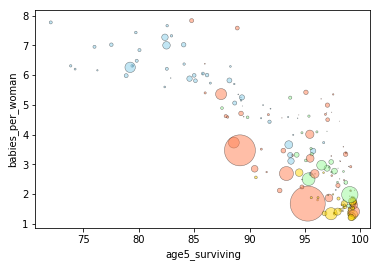

In [10]:
plotdata()

The package which we are going to use here is from the Python Package stats models - OLS - Ordinary Least Sqaures. Least squares means that models are fit by minimizing the sum of square differences between model predictions and observations. Furthermore, ordinary here means that the model coefficients appear lineally in the model formulas.

In [11]:
# babies_per_woman ~ age5_surviving - is an example of the usage here

In [12]:
model = smf.ols(formula = "babies_per_woman ~ 1", data  = gdata)

In [13]:
grandmean = model.fit()

In [14]:
grandmean

In [15]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving, fit.predict(gdata), c=colors, s=30, linewidths=0.5, edgecolors='k', marker='D')

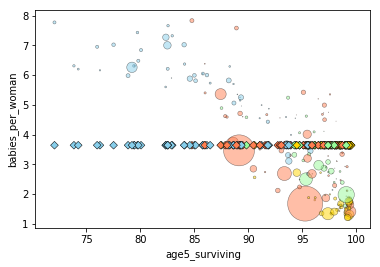

In [16]:
plotfit(grandmean)

In [17]:
grandmean.params

Intercept    3.641593
dtype: float64

In [18]:
gdata.babies_per_woman.mean()

3.6415934065934086

In [19]:
groupmeans = model = smf.ols(formula = "babies_per_woman ~ 1 + region", data  = gdata).fit()

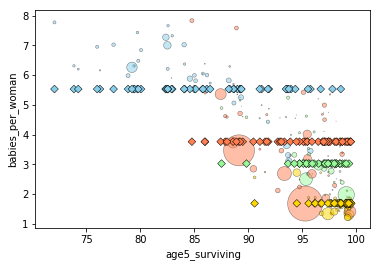

In [20]:
plotfit(groupmeans)

In [21]:
groupmeans.params

Intercept            5.530189
region[T.America]   -2.505340
region[T.Asia]      -1.769419
region[T.Europe]    -3.841780
dtype: float64

In [22]:
groupmeans = model = smf.ols(formula = "babies_per_woman ~ -1 + region", data  = gdata).fit()

In [23]:
groupmeans.params

region[Africa]     5.530189
region[America]    3.024848
region[Asia]       3.760769
region[Europe]     1.688409
dtype: float64

In [24]:
gdata.groupby('region').babies_per_woman.mean()

region
Africa     5.530189
America    3.024848
Asia       3.760769
Europe     1.688409
Name: babies_per_woman, dtype: float64

In [25]:
surving = groupmeans = model = smf.ols(formula = "babies_per_woman ~ -1 + region + age5_surviving", data  = gdata).fit()

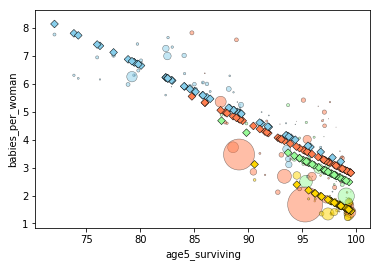

In [26]:
plotfit(surving)

In [27]:
surving.params

region[Africa]     21.553817
region[America]    20.964313
region[Asia]       21.325422
region[Europe]     19.969806
age5_surviving     -0.186062
dtype: float64

In [28]:
surving_byregion = groupmeans = model = smf.ols(formula = "babies_per_woman ~ -1 + region + age5_surviving:region", data  = gdata).fit()

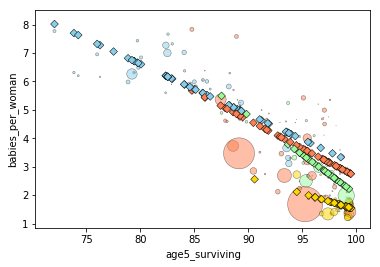

In [29]:
plotfit(surving_byregion)

In [30]:
surving_byregion.params

region[Africa]                    20.746984
region[America]                   29.702891
region[Asia]                      22.543364
region[Europe]                    12.806876
age5_surviving:region[Africa]     -0.176694
age5_surviving:region[America]    -0.276696
age5_surviving:region[Asia]       -0.198964
age5_surviving:region[Europe]     -0.113160
dtype: float64

In [31]:
surving_byregion_population = groupmeans = model = smf.ols(formula = "babies_per_woman ~ -1 + region + age5_surviving:region + population", data  = gdata).fit()

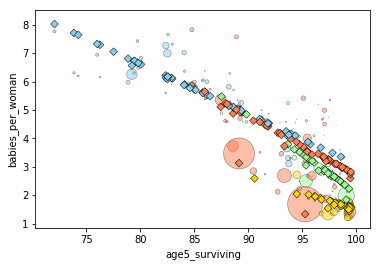

In [32]:
plotfit(surving_byregion_population)

In [33]:
surving_byregion_population.params

region[Africa]                    2.080407e+01
region[America]                   2.924871e+01
region[Asia]                      2.362697e+01
region[Europe]                    1.296551e+01
age5_surviving:region[Africa]    -1.770538e-01
age5_surviving:region[America]   -2.715125e-01
age5_surviving:region[Asia]      -2.091033e-01
age5_surviving:region[Europe]    -1.144155e-01
population                       -1.935439e-09
dtype: float64